## Load Data

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

# Load data from PostgreSQL database and print out
# observations
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices',con=engine)

# No need for an open connection, as we're only doing a single query
engine.dispose()

house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


## Convert Features

In [2]:
# Convert street and overallqual to numerical variables
house_df['street_is_paved'] = np.where(house_df['street'] == 'Pave', 1, 0)
house_df['overallqual_above_6'] = np.where(house_df['overallqual'] > 6, 1, 0)

house_df[['id', 'street', 'street_is_paved', 'overallqual', 'overallqual_above_6']].head(25)

,id,street,street_is_paved,overallqual,overallqual_above_6
0,1,Pave,1,7,1
1,2,Pave,1,6,0
2,3,Pave,1,7,1
3,4,Pave,1,7,1
4,5,Pave,1,8,1
5,6,Pave,1,5,0
6,7,Pave,1,8,1
7,8,Pave,1,7,1
8,9,Pave,1,7,1
9,10,Pave,1,5,0


## Build Model

In [4]:
# Y is the target variable
Y = house_df['saleprice']

# X is the feature set
X = house_df[['street_is_paved', 'overallqual_above_6', 'lotarea', 'totalbsmtsf', 'grlivarea', 'garagearea']]

# Manually add constant
X = sm.add_constant(X)

# Use fit method to build model
results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     618.5
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:52:31   Log-Likelihood:                -17618.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1453   BIC:                         3.529e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.904e+04   1.82e+04     -2.151      0.032   -7.46e+04   -3437.927
street_is_paved      3.872e+04   1.78e+04      2.178      0.030    3847.798    7.36e+04
overallqual_above_6  4.742e+04   2830.163     16.755      0.000    4.19e+04     5.3e+04
lotarea                 0.4752      0.120      3.967      0.000       0.240       0.710
totalbsmtsf            40.0037      3.092     12.937      0.000      33.938      46.069
grlivarea              53.5868      2.666     20.102      0.000      48.358      58.816
garagearea             74.1952      6.519     11.382      0.000      61.408      86.982
==============================================================================
Omnibus:                      546.237   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61601.254
Skew:                          -0.719   Prob(JB):                         0.00
Kurtosis:                      34.789   Cond. No.                     3.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
# Y is the target variable
Y = house_df['saleprice']

# X is the feature set
X = house_df[['street_is_paved', 'overallqual_above_6', 'lotarea', 'totalbsmtsf', 'grlivarea', 'garagearea']]

# Create a LinearRegression model object
# from scikit-learn's linear_model module
lrm = linear_model.LinearRegression()

# Use fit method to estimate the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [3.87238137e+04 4.74186107e+04 4.75239928e-01 4.00037344e+01
 5.35867818e+01 7.41952054e+01]

Intercept: 
 -39042.521643964545


## Check Gauss-Markov Conditions

### Assumption 1: Linearity of the model in its coefficients

Condition met. Model used takes into account this assumption.

### Assumption 2: Error term should be zero on average

In [6]:
predictions = lrm.predict(X)
errors = Y - predictions


print("Mean of the errors in the temperature model is: {}".format(np.mean(errors)))

Mean of the errors in the temperature model is: 1.4781157728539753e-11


Condition met. Constant term included in model. Average of the model's errors is essentially zero.

### Assumption 3: Homoscedasticity

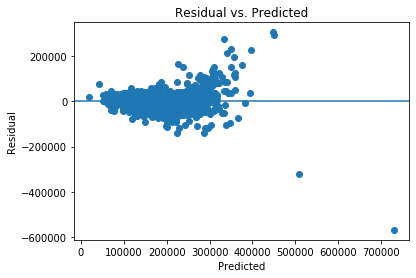

In [8]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [9]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print('Bartlett test statistic value is {0:2g} and p value is {1:3g}'.format(bart_stats[0], bart_stats[1]))
print('\nLevene test statistic value is {0:3g} and p value is {1:.3g}'.format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 309.5 and p value is 2.80599e-69

Levene test statistic value is 378.227 and p value is 2.58e-79


Condition not met. The model poorly predicts the price of more expensive homes ($250,000 plus). The p-values for both tests are less than 0.05, suggesting that the errors are heteroscedastic rather than homoscedastic.

The estimated coefficients are still valid, but downstream t-tests may be unreliable.

### Assumption 4: Low multicollinearity

In [17]:
# Look at correlation matrix for features
house_df[['street_is_paved', 'overallqual_above_6', 'lotarea', 'totalbsmtsf', 'grlivarea', 'garagearea']].corr()

,street_is_paved,overallqual_above_6,lotarea,totalbsmtsf,grlivarea,garagearea
street_is_paved,1.000000,0.049795,-0.197131,0.005068,0.044121,-0.047794
overallqual_above_6,0.049795,1.000000,0.080850,0.409955,0.494414,0.486712
lotarea,-0.197131,0.080850,1.000000,0.260833,0.263116,0.180403
totalbsmtsf,0.005068,0.409955,0.260833,1.000000,0.454868,0.486665
grlivarea,0.044121,0.494414,0.263116,0.454868,1.000000,0.468997
garagearea,-0.047794,0.486712,0.180403,0.486665,0.468997,1.000000


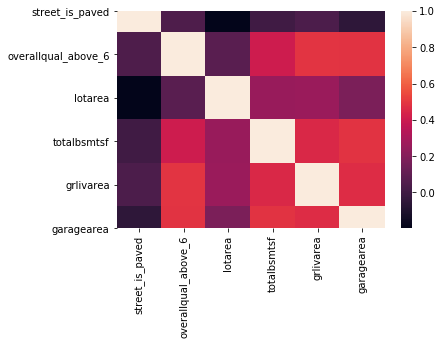

In [18]:
sns.heatmap(house_df[['street_is_paved', 'overallqual_above_6', 'lotarea', 'totalbsmtsf', 'grlivarea', 'garagearea']].corr())
plt.show()

    street_is_paved and overallqual_above_6 (0.049795)
    street_is_paved and lotarea (0.197131)
    street_is_paved and totalbsmtsf (0.005068)
    street_is_paved and grlivarea (0.044121)
    street_is_paved and garagearea (0.047794)

    overallqual_above_6 and lotarea (0.080850)
    overallqual_above_6 and totalbsmtsf (0.409955)
    overallqual_above_6 and grlivarea (0.494414)
    overallqual_above_6 and garagearea (0.486712)

    lotarea and totalbsmtsf (0.260833)
    lotarea and grlivarea (0.263116)
    lotarea and garagearea (0.180403)

    totalbsmtsf and grlivarea (0.454868)
    totalbsmtsf and garagearea (0.486665)

    grlivarea and garagearea (0.468997)

Condition not met. totalbsmtsf, grlivarea, garagearea are pretty highly correlated with each other, as well as the other features.

This isn’t necessarily a problem since our only goal is prediction. However, such multicollinearity can cause us to underestimate the relationship between features and outcomes when determining which features matter most in predicting house prices.

### Assumption 5: Error terms should be uncorrelated with one another

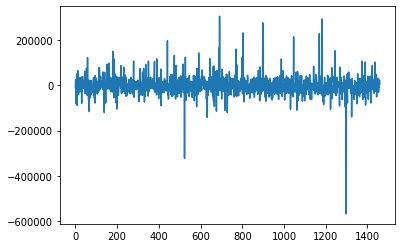

In [19]:
plt.plot(errors)
plt.show()

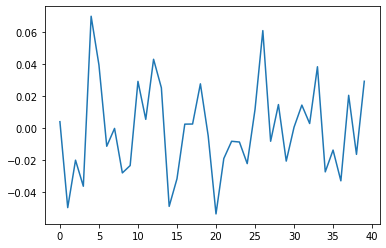

In [20]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

Condition met. Observe randomness in the visualization. Autocorrelation between the errors of my house model is low, ranging from -0.04 to just above 0.06.

### Assumption 6: Features shouldn't be correlated with the errors

In [22]:
house_df['errors'] = errors
house_df[['street_is_paved', 'overallqual_above_6', 'lotarea', 'totalbsmtsf', 'grlivarea', 'garagearea', 'errors']].corr()

,street_is_paved,overallqual_above_6,lotarea,totalbsmtsf,grlivarea,garagearea,errors
street_is_paved,1.000000e+00,4.979506e-02,-1.971309e-01,5.067534e-03,4.412134e-02,-4.779429e-02,-6.681882e-14
overallqual_above_6,4.979506e-02,1.000000e+00,8.085010e-02,4.099548e-01,4.944145e-01,4.867124e-01,-2.159742e-13
lotarea,-1.971309e-01,8.085010e-02,1.000000e+00,2.608331e-01,2.631162e-01,1.804028e-01,-7.091993e-13
totalbsmtsf,5.067534e-03,4.099548e-01,2.608331e-01,1.000000e+00,4.548682e-01,4.866655e-01,-2.543963e-13
grlivarea,4.412134e-02,4.944145e-01,2.631162e-01,4.548682e-01,1.000000e+00,4.689975e-01,-2.834700e-13
garagearea,-4.779429e-02,4.867124e-01,1.804028e-01,4.866655e-01,4.689975e-01,1.000000e+00,-1.939336e-13
errors,-6.681882e-14,-2.159742e-13,-7.091993e-13,-2.543963e-13,-2.834700e-13,-1.939336e-13,1.000000e+00


Condition met. Features are not correlated with the errors.

### Normality of the Errors

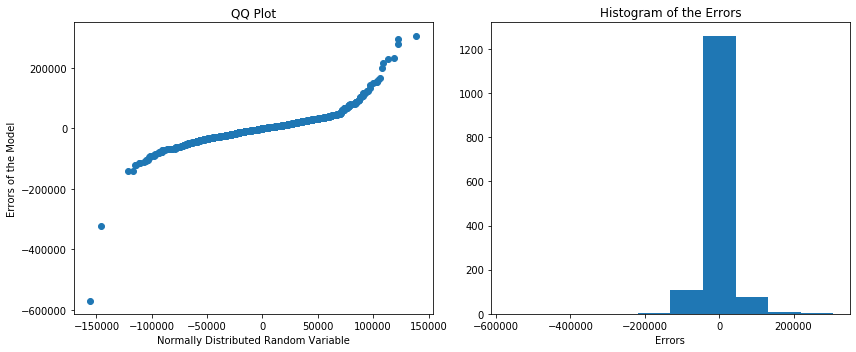

In [23]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("Normally Distributed Random Variable")
plt.ylabel("Errors of the Model")
plt.title("QQ Plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("Errors")
plt.title("Histogram of the Errors")

plt.tight_layout()
plt.show()

In [24]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 61601.253871444904 and p value is 0.0
Normality test statistics is 546.2372857084962 and p value is 2.432654899149904e-119


Errors are not normally distributed. This means that we cannot measure the statistical significance of our estimated coefficients. Perhaps the addition of another feature would correct this.